In [5]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [6]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 21s 0us/step


(50000, 32, 32, 3)

In [7]:
x_test.shape

(10000, 32, 32, 3)

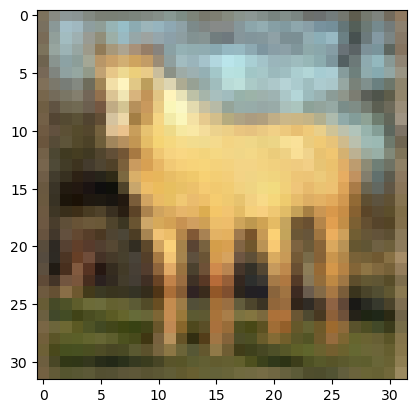

In [13]:
plt.imshow(x_train[575])

In [14]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [15]:
y_train=y_train.reshape(-1,)

In [25]:
def showphoto(x,y,index):
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

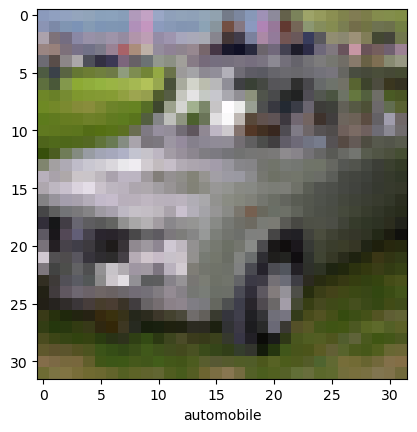

In [26]:
showphoto(x_train,y_train,44)

In [28]:
y_test=y_test.reshape(-1,)

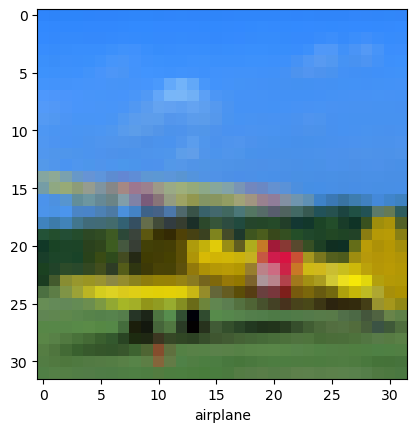

In [29]:
showphoto(x_test,y_test,44)

In [30]:
x_train=x_train/255
x_test=x_test/255

In [52]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [53]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [54]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4809 - accuracy: 0.4642
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1223 - accuracy: 0.6046
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9865 - accuracy: 0.6557
Epoch 4/10
1563/1563 [==============================] - 16s 11ms/step - loss: 0.9004 - accuracy: 0.6858
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8295 - accuracy: 0.7090
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7759 - accuracy: 0.7325
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7312 - accuracy: 0.7452
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6878 - accuracy: 0.7617
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6422 - accuracy: 0.7791
Epoch 10/10
1563/1563 [==============================] - 17s 11m

In [55]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9336 - accuracy: 0.6992


[0.9336227774620056, 0.6991999745368958]

In [56]:
y_predict=cnn.predict(x_test)

313/313 [==============================] - 2s 4ms/step


In [57]:
y_predict[:5]

array([[2.2300635e-04, 6.5103704e-06, 3.2438632e-04, 9.5444113e-01,
        3.6786174e-04, 1.1154860e-02, 1.9751608e-02, 9.7405264e-06,
        1.3701980e-02, 1.8813462e-05],
       [1.3567802e-03, 4.1749966e-03, 1.5844472e-08, 1.0707838e-06,
        1.8629929e-09, 6.0609349e-09, 2.1544473e-08, 2.5834428e-09,
        9.9446142e-01, 5.6915915e-06],
       [1.3274929e-01, 2.7959369e-02, 1.8980642e-04, 9.1007818e-04,
        6.7945657e-04, 2.1807491e-04, 8.3138555e-04, 8.0439064e-04,
        8.1055391e-01, 2.5104305e-02],
       [8.4344983e-01, 8.5879967e-04, 1.1878842e-03, 4.6041179e-03,
        2.1187577e-03, 9.2903254e-05, 8.9962909e-04, 9.8276878e-06,
        1.4636955e-01, 4.0865428e-04],
       [2.6267051e-07, 1.5873711e-06, 1.2751407e-03, 8.5245296e-03,
        1.9436177e-02, 1.3488853e-04, 9.7062194e-01, 3.1821912e-06,
        2.1991918e-06, 1.0445422e-07]], dtype=float32)

In [63]:
y_classes=[np.argmax(x) for x in y_predict]

In [65]:
y_classes[:5]

[3, 8, 8, 0, 6]

In [66]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

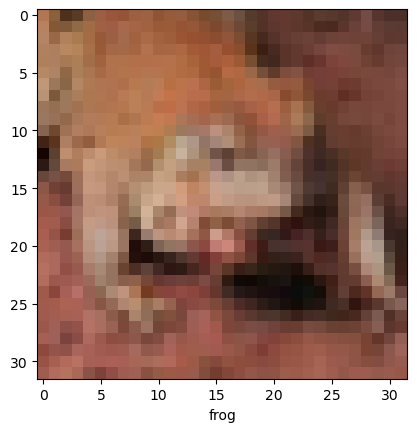

In [68]:
showphoto(x_test,y_test,5)

In [69]:
classes[y_classes[5]]

'frog'

In [72]:
def rando(n):
    showphoto(x_test,y_test,n)
    print(classes[y_classes[n]])

cat


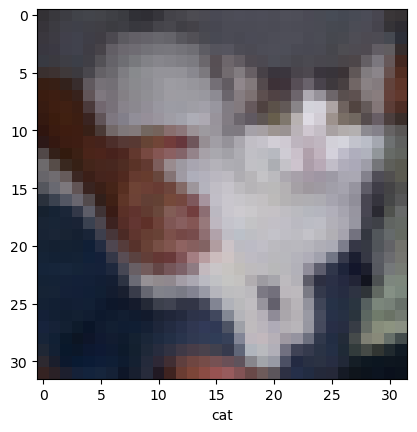

In [75]:
rando(77)